## Description
In this part of the project, we will use supervised learning algorithms, namely, Decision Trees/Random Forests, SVM, and Logistic Regression algorithms to predict disease type given gene expression data.

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree import plot_tree
# from sklearn.tree.export import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import KFold # import KFold
import matplotlib.pyplot as plt

In [5]:
#Settings
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Load in Data (Run this cell only once - large file)

In [6]:
data = pd.read_csv("combinedNormalized.csv")
data

ENSG00000000003.13  ENSG00000000005.5  ENSG00000000419.11  \
0              2715.2490          1710.5652           1981.2572   
1              1572.9316            22.2585           3554.9950   
2              2788.3903            13.1767           1316.6554   
3              4838.6908            24.1550           1190.1840   
4              4978.2465             8.3615           1959.7338   
...                  ...                ...                 ...   
6719             52.8694             1.0367           1419.1819   
6720              0.0000             0.0000           2378.1717   
6721            885.9091             0.0000           3185.3644   
6722            737.3829             0.0000           1134.2618   
6723             11.9920             0.0000            427.2158   

      ENSG00000000457.12  ENSG00000000460.15  ENSG00000000938.11  \
0              1194.1682            465.3820             47.8917   
1               457.8884            657.1547            570.2407   
2               699.3782            185.4873           1155.4944   
3               883.8543            103.2078            126.2649   
4               652.1994            181.8633            401.3535   
...                  ...                 ...                 ...   
6719           1108.1851            534.9144          24377.9989   
6720           2148.7078           1605.2407           3155.1283   
6721            463.5823            343.0726             51.0266   
6722           1159.0668            651.6932            170.2520   
6723            155.8963              2.9980          22922.7488   

      ENSG00000000971.14  ENSG00000001036.12  ENSG00000001084.9  \
0               843.3097           3359.7041          1892.7617   
1               611.5779           7962.1713          1842.1531   
2              1013.5915           4967.6121          1831.5599   
3              2285.9438           4580.6712          3606.7845   
4              1652.4476           6934.8448          2492.7814   
...                  ...                 ...                ...   
6719            189.7080           1458.5748          4508.4163   
6720            549.5056            719.5907          1373.7640   
6721             64.0547           1697.9925           607.9768   
6722             20.2949           6520.3143          1455.5984   
6723            146.9023            703.0323           184.3773   

      ENSG00000001167.13  ENSG00000001460.16  ENSG00000001461.15  \
0              6350.8507            687.1412           2182.1939   
1              1203.0171            348.7160           1047.2078   
2              1448.4223            486.5239           1920.7560   
3              1334.0162            648.8918           3477.2257   
4              1613.7755           2122.7837           8123.2273   
...                  ...                 ...                 ...   
6719           3060.2081            270.5672           2549.1367   
6720           5456.8121            455.9085           3201.4237   
6721           5871.3192            146.5658           1434.1739   
6722           2778.1522            323.5916           2314.7510   
6723            493.1719             49.4671            227.8484   

      ENSG00000001497.15  ENSG00000001561.6  ENSG00000001617.10  \
0              4570.5303           679.8534           3435.7061   
1              3107.7058           238.4836           1343.9874   
2              2722.5069          1338.9544           9151.7180   
3              1987.2998          3550.7887           1492.1218   
4              3039.4165          2189.6759            524.6861   
...                  ...                ...                 ...   
6719           2693.2319          1824.5143             41.4662   
6720           4820.7543          2354.0176              5.0321   
6721           3670.6602          1048.7600              9.7711   
6722           2844.6746          4796.3716              3.3825   
6723            451.1998 

## Preprocessing

In [7]:
dataset = data.iloc[0:6728,1:60485]
dataset = dataset.rename(columns = {'Cancer': 'CancerType'})
dataset.loc[dataset.CancerType == 'Brease', 'CancerType'] = 'Breast'
dataset.loc[dataset.CancerType == 'Hema', 'CancerType'] = 'Blood'
dataset.loc[dataset.CancerType == 'Bronchus', 'CancerType'] = 'Lung'
dataset

ENSG00000000005.5  ENSG00000000419.11  ENSG00000000457.12  \
0             1710.5652           1981.2572           1194.1682   
1               22.2585           3554.9950            457.8884   
2               13.1767           1316.6554            699.3782   
3               24.1550           1190.1840            883.8543   
4                8.3615           1959.7338            652.1994   
...                 ...                 ...                 ...   
6719             1.0367           1419.1819           1108.1851   
6720             0.0000           2378.1717           2148.7078   
6721             0.0000           3185.3644            463.5823   
6722             0.0000           1134.2618           1159.0668   
6723             0.0000            427.2158            155.8963   

      ENSG00000000460.15  ENSG00000000938.11  ENSG00000000971.14  \
0               465.3820             47.8917            843.3097   
1               657.1547            570.2407            611.5779   
2               185.4873           1155.4944           1013.5915   
3               103.2078            126.2649           2285.9438   
4               181.8633            401.3535           1652.4476   
...                  ...                 ...                 ...   
6719            534.9144          24377.9989            189.7080   
6720           1605.2407           3155.1283            549.5056   
6721            343.0726             51.0266             64.0547   
6722            651.6932            170.2520             20.2949   
6723              2.9980          22922.7488            146.9023   

      ENSG00000001036.12  ENSG00000001084.9  ENSG00000001167.13  \
0              3359.7041          1892.7617           6350.8507   
1              7962.1713          1842.1531           1203.0171   
2              4967.6121          1831.5599           1448.4223   
3              4580.6712          3606.7845           1334.0162   
4              6934.8448          2492.7814           1613.7755   
...                  ...                ...                 ...   
6719           1458.5748          4508.4163           3060.2081   
6720            719.5907          1373.7640           5456.8121   
6721           1697.9925           607.9768           5871.3192   
6722           6520.3143          1455.5984           2778.1522   
6723            703.0323           184.3773            493.1719   

      ENSG00000001460.16  ENSG00000001461.15  ENSG00000001497.15  \
0               687.1412           2182.1939           4570.5303   
1               348.7160           1047.2078           3107.7058   
2               486.5239           1920.7560           2722.5069   
3               648.8918           3477.2257           1987.2998   
4              2122.7837           8123.2273           3039.4165   
...                  ...                 ...                 ...   
6719            270.5672           2549.1367           2693.2319   
6720            455.9085           3201.4237           4820.7543   
6721            146.5658           1434.1739           3670.6602   
6722            323.5916           2314.7510           2844.6746   
6723             49.4671            227.8484            451.1998   

      ENSG00000001561.6  ENSG00000001617.10  ENSG00000001626.13  \
0              679.8534           3435.7061              2.0822   
1              238.4836           1343.9874              1.0599   
2             1338.9544           9151.7180            136.8349   
3             3550.7887           1492.1218            443.5741   
4             2189.6759            524.6861            112.8807   
...                 ...                 ...                 ...   
6719          1824.5143             41.4662              3.1100   
6720          2354.0176              5.0321              3.0193   
6721          1048.7600              9.7711              0.0000   
6722          4796.3716              3.3825              4.5100   
6723          1197.7031  

In [8]:
check = dataset.iloc[:,58607]
check_np = check.to_numpy()
print(check)
print(np.unique(check_np))

0       Kidney
1       Kidney
2       Kidney
3       Kidney
4       Kidney
         ...  
6719     Blood
6720     Blood
6721     Blood
6722     Blood
6723     Blood
Name: CancerType, Length: 6724, dtype: object
['Blood' 'Breast' 'Kidney' 'Lung']


## Decision Tree Model

In [9]:
#Shuffle Dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)
# Reading data & split into training and testing sets
X = dataset.drop(['CancerType'], 1)
#print(X)
y = dataset['CancerType']
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12345)

#Model Definition & Fitting
#clf = DecisionTreeClassifier()
clf = RandomForestClassifier(min_samples_leaf = 50, max_depth = 4)
clf = clf.fit(X_train, y_train)

# Predict based on the given features for the test set
y_pred = clf.predict(X_test)
y_pred_train = clf.predict(X_train)
#predictions_probability = clf.predict_proba(X_test)
print(y_pred)
print(y_test)

['Lung' 'Kidney' 'Blood' ... 'Kidney' 'Breast' 'Kidney']
1739      Lung
6112    Kidney
2803     Blood
953       Lung
4244     Blood
         ...  
5984    Kidney
3871    Kidney
4349    Kidney
6154    Breast
3929    Kidney
Name: CancerType, Length: 2018, dtype: object


## Decision Tree Metrics & Plots

In [10]:
print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
print("Train Precision:",metrics.precision_score(y_train, y_pred_train, average='micro'))
print("Train Recall:",metrics.recall_score(y_train, y_pred_train, average='micro'))

print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Test Precision:",metrics.precision_score(y_test, y_pred, average='micro'))
print("Test Recall:",metrics.recall_score(y_test, y_pred, average='micro'))


Train Accuracy: 0.996600084997875
Train Precision: 0.996600084997875
Train Recall: 0.996600084997875
Test Accuracy: 0.9965312190287413
Test Precision: 0.9965312190287413
Test Recall: 0.9965312190287413


## Filter Features

In [11]:
imp_vals = clf.feature_importances_
print('max:',np.max(imp_vals))
print('min:',np.min(imp_vals))
print('mean:',np.mean(imp_vals))
imp_arr = imp_vals > 0
num_imp = 0
for i in imp_arr:
    if i>0:
        num_imp+=1
        
print('number of important features',num_imp)
# with np.printoptions(threshold=np.inf):
#      print(imp_vals>0)
print('bool array shape: ',imp_arr.shape)
print('dataset shape: ',X.shape)
filt_X = X.loc[:, imp_arr]
filt_X

max: 0.010315900965106348
min: 0.0
mean: 1.7062808196973057e-05
number of important features 763
bool array shape:  (58607,)
dataset shape:  (6724, 58607)


ENSG00000005108.14  ENSG00000005249.11  ENSG00000005893.14  \
0              1250.9636            532.9309           5218.4508   
1               559.3913            440.1093          20840.4112   
2                11.8650           2736.5070          12333.1576   
3                27.1206            931.5342           4084.6008   
4              1337.3508            408.0581          31909.5219   
...                  ...                 ...                 ...   
6719            207.6338           4602.2143          10632.6672   
6720           1335.0207            203.9051          15397.3745   
6721            612.6712            636.9755           6471.0234   
6722              3.2753           1002.2446           7001.5194   
6723            228.6789             59.6554          19136.1147   

      ENSG00000006042.10  ENSG00000006210.6  ENSG00000009950.14  \
0              1524.5484          2208.0017             46.7840   
1              1311.0734         15560.1274           1032.4060   
2                 4.3146             1.0786             16.1796   
3              1486.9173          8302.4463             90.7951   
4              7017.9767         28565.1066           5166.6595   
...                  ...                ...                 ...   
6719           1449.4052           521.1005            504.9736   
6720           5695.1417         21068.1694            612.7299   
6721            224.8149           606.5951             13.1648   
6722              0.0000             2.1835              5.4588   
6723             61.8648             0.0000              0.0000   

      ENSG00000010379.14  ENSG00000011105.10  ENSG00000011347.8  \
0                25.4261           2419.5468            79.3294   
1              4908.0418           8176.9847            27.7639   
2                 9.7078              9.7078             0.0000   
3                 1.1792           1572.9958          6539.6062   
4             10619.8942          23530.3132            69.5672   
...                  ...                 ...                ...   
6719             13.1031           5277.5282          4979.1806   
6720           9087.4741           9459.7785            36.5203   
6721              3.0380            389.8817           195.4472   
6722              3.2753             32.7531             2.1835   
6723             32.0371             27.6182             1.1047   

      ENSG00000012504.12  ENSG00000013588.5  ENSG00000035664.10  \
0                12.2045         18565.1141           3741.7035   
1              7253.5778            79.1785            365.0440   
2                 0.0000            12.9437           5969.1879   
3                 0.0000           715.7485           2637.7748   
4              3612.3007           268.9238            131.8661   
...                  ...                ...                 ...   
6719              0.0000          2299.0913            213.6814   
6720           2263.2457            95.3586            286.0759   
6721              0.0000          6631.0268            557.9865   
6722              0.0000             2.1835             66.5980   
6723              0.0000             2.2095             43.0844   

      ENSG00000035720.6  ENSG00000036448.8  ENSG00000037965.5  \
0               56.9544            46.7840             1.0170   
1               52.4429           528.5425           133.6781   
2               92.7629            20.4941             0.0000   
3               28.2998             1.1792           494.0669   
4               37.3794           227.3912           643.7558   
...                 ...                ...                ...   
6719            16.1269           410.2280           275.1652   
6720             9.1301           961.7019           134.9223   
6721            63.7988             4.0507             2.0254   
6722           457.4515            56.7720             0.0000   
6723          3916.2641            29.8277             0.00

## Export Filtered Dataset

In [12]:
exportDataset = filt_X.copy()
exportDataset['CancerType'] = y
exportDataset
#exportDataset.to_csv(r'combinedFiltered.csv', index = False)

ENSG00000005108.14  ENSG00000005249.11  ENSG00000005893.14  \
0              1250.9636            532.9309           5218.4508   
1               559.3913            440.1093          20840.4112   
2                11.8650           2736.5070          12333.1576   
3                27.1206            931.5342           4084.6008   
4              1337.3508            408.0581          31909.5219   
...                  ...                 ...                 ...   
6719            207.6338           4602.2143          10632.6672   
6720           1335.0207            203.9051          15397.3745   
6721            612.6712            636.9755           6471.0234   
6722              3.2753           1002.2446           7001.5194   
6723            228.6789             59.6554          19136.1147   

      ENSG00000006042.10  ENSG00000006210.6  ENSG00000009950.14  \
0              1524.5484          2208.0017             46.7840   
1              1311.0734         15560.1274           1032.4060   
2                 4.3146             1.0786             16.1796   
3              1486.9173          8302.4463             90.7951   
4              7017.9767         28565.1066           5166.6595   
...                  ...                ...                 ...   
6719           1449.4052           521.1005            504.9736   
6720           5695.1417         21068.1694            612.7299   
6721            224.8149           606.5951             13.1648   
6722              0.0000             2.1835              5.4588   
6723             61.8648             0.0000              0.0000   

      ENSG00000010379.14  ENSG00000011105.10  ENSG00000011347.8  \
0                25.4261           2419.5468            79.3294   
1              4908.0418           8176.9847            27.7639   
2                 9.7078              9.7078             0.0000   
3                 1.1792           1572.9958          6539.6062   
4             10619.8942          23530.3132            69.5672   
...                  ...                 ...                ...   
6719             13.1031           5277.5282          4979.1806   
6720           9087.4741           9459.7785            36.5203   
6721              3.0380            389.8817           195.4472   
6722              3.2753             32.7531             2.1835   
6723             32.0371             27.6182             1.1047   

      ENSG00000012504.12  ENSG00000013588.5  ENSG00000035664.10  \
0                12.2045         18565.1141           3741.7035   
1              7253.5778            79.1785            365.0440   
2                 0.0000            12.9437           5969.1879   
3                 0.0000           715.7485           2637.7748   
4              3612.3007           268.9238            131.8661   
...                  ...                ...                 ...   
6719              0.0000          2299.0913            213.6814   
6720           2263.2457            95.3586            286.0759   
6721              0.0000          6631.0268            557.9865   
6722              0.0000             2.1835             66.5980   
6723              0.0000             2.2095             43.0844   

      ENSG00000035720.6  ENSG00000036448.8  ENSG00000037965.5  \
0               56.9544            46.7840             1.0170   
1               52.4429           528.5425           133.6781   
2               92.7629            20.4941             0.0000   
3               28.2998             1.1792           494.0669   
4               37.3794           227.3912           643.7558   
...                 ...                ...                ...   
6719            16.1269           410.2280           275.1652   
6720             9.1301           961.7019           134.9223   
6721            63.7988             4.0507             2.0254   
6722           457.4515            56.7720             0.0000   
6723          3916.2641            29.8277             0.00

## Decision Tree Model of Filtered Dataset

In [37]:
#Model Definition & Fitting
#clf = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 20, criterion = 'gini')
clf = RandomForestClassifier(bootstrap = True, n_estimators = 200, min_samples_leaf = 10, max_depth = 10, criterion = 'entropy')

#Cross Validation
n_folds = 4
kf = KFold(n_splits=n_folds, random_state = 54321, shuffle = True)

#Split Train/CV from Test
X_train, X_test, y_train, y_test = train_test_split(filt_X, y, test_size = 0.3, random_state=12345)

train_acc_arr = np.array([])
test_acc_arr = np.array([])
for i, (train_index, cv_index) in enumerate(kf.split(X_train)):
    X_train, X_cv = filt_X.iloc[train_index], filt_X.iloc[cv_index]
    y_train, y_cv = y.iloc[train_index], y.iloc[cv_index]
    clf = clf.fit(X_train, y_train)

    # Predict based on the given features for the test set
    y_pred_cv = clf.predict(X_cv)
    y_pred_train = clf.predict(X_train)
    #predictions_probability = clf.predict_proba(X_test)
    print('Fold #: ', i)
    print("Train Accuracy:",metrics.accuracy_score(y_train, y_pred_train))
    train_acc_arr = np.append(train_acc_arr,metrics.accuracy_score(y_train, y_pred_train))
    print("CV Accuracy:",metrics.accuracy_score(y_cv, y_pred_cv))
    test_acc_arr = np.append(test_acc_arr,metrics.accuracy_score(y_cv, y_pred_cv))
print("Avg Train Accuracy:",np.mean(train_acc_arr))
print("Avg CV Accuracy:",np.mean(test_acc_arr))

y_pred_test = clf.predict(X_test)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred_test))
print('---Test Data---')
y_test

Fold #:  0
Train Accuracy: 0.9985831680362709
CV Accuracy: 0.9983007646559049
Fold #:  1
Train Accuracy: 0.9985831680362709
CV Accuracy: 0.9957519116397621
Fold #:  2
Train Accuracy: 0.9991501416430595
CV Accuracy: 0.9965986394557823
Fold #:  3
Train Accuracy: 0.9991501416430595
CV Accuracy: 0.9965986394557823
Avg Train Accuracy: 0.9988666548396652
Avg CV Accuracy: 0.9968124888018078
Test Accuracy: 0.998017839444995
---Test Data---


1739      Lung
6112    Kidney
2803     Blood
953       Lung
4244     Blood
         ...  
5984    Kidney
3871    Kidney
4349    Kidney
6154    Breast
3929    Kidney
Name: CancerType, Length: 2018, dtype: object

## Visualize Tree

In [14]:
estimator = clf.estimators_[3]

classes = np.unique(y.to_numpy())
features = filt_X.columns

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = features,
                class_names = classes,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

## Most Important Features

In [15]:
num_feat = 5
np_arr = np.zeros((num_feat,4))
cancer_types = np.unique(y)
most_important_genes = pd.DataFrame(np_arr,columns = cancer_types)
most_expressed_genes = most_important_genes.copy()
print('Cancer Types: ',cancer_types)
most_important_genes

Cancer Types:  ['Blood' 'Breast' 'Kidney' 'Lung']


Blood  Breast  Kidney  Lung
0    0.0     0.0     0.0   0.0
1    0.0     0.0     0.0   0.0
2    0.0     0.0     0.0   0.0
3    0.0     0.0     0.0   0.0
4    0.0     0.0     0.0   0.0

Cancer Type:  Blood
Index(['ENSG00000114019.13', 'ENSG00000166033.10', 'ENSG00000197702.10',
       'ENSG00000141736.12', 'ENSG00000176720.4'],
      dtype='object')


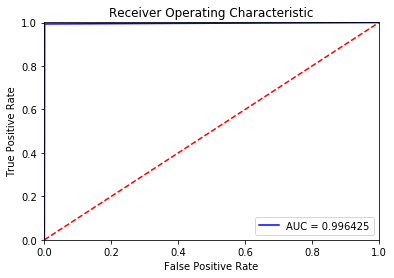

Cancer Type:  Breast
Index(['ENSG00000104447.10', 'ENSG00000224842.2', 'ENSG00000107485.14',
       'ENSG00000164107.8', 'ENSG00000102313.8'],
      dtype='object')


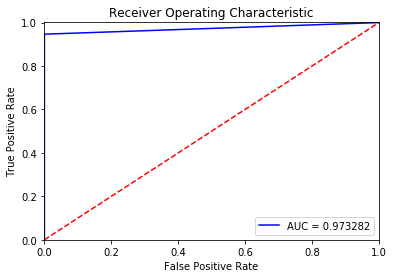

Cancer Type:  Kidney
Index(['ENSG00000125618.15', 'ENSG00000103449.10', 'ENSG00000100557.8',
       'ENSG00000198914.2', 'ENSG00000145692.13'],
      dtype='object')


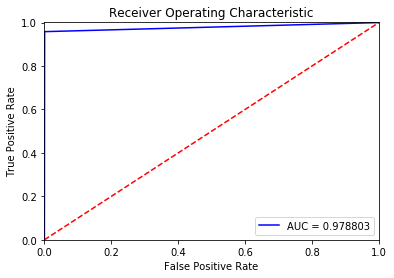

Cancer Type:  Lung
Index(['ENSG00000122852.13', 'ENSG00000121075.8', 'ENSG00000047936.9',
       'ENSG00000185303.14', 'ENSG00000133661.14'],
      dtype='object')


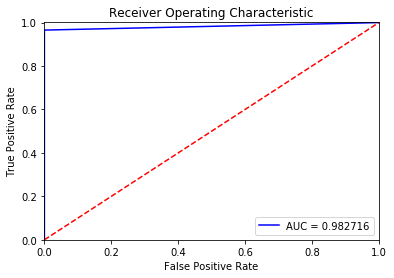

Blood              Breast              Kidney  \
0  ENSG00000114019.13  ENSG00000104447.10  ENSG00000125618.15   
1  ENSG00000166033.10   ENSG00000224842.2  ENSG00000103449.10   
2  ENSG00000197702.10  ENSG00000107485.14   ENSG00000100557.8   
3  ENSG00000141736.12   ENSG00000164107.8   ENSG00000198914.2   
4   ENSG00000176720.4   ENSG00000102313.8  ENSG00000145692.13   

                 Lung  
0  ENSG00000122852.13  
1   ENSG00000121075.8  
2   ENSG00000047936.9  
3  ENSG00000185303.14  
4  ENSG00000133661.14

In [35]:
# #Shuffle Dataset
# dataset = dataset.sample(frac=1).reset_index(drop=True)

# Reading data & split into training and testing sets
X = exportDataset.drop(['CancerType'], 1)
y = exportDataset['CancerType']
y_prime = y.copy()
#plt.figure()
for i, cancer in enumerate(cancer_types):
    y_prime = y.copy()
    y_prime.loc[y_prime != cancer] = '0'
    y_prime.loc[y_prime == cancer] = '1'
    
    #Training
    X_train, X_test, y_train, y_test = train_test_split(X, y_prime, test_size = 0.3, random_state=12345)
#     print(y_train)
#     print(X_train)
    clf = RandomForestClassifier(min_samples_leaf = 50, max_depth = 4)
    clf = clf.fit(X_train, y_train)
    
    #Feature Importance
    imp_vals = np.array(clf.feature_importances_)
    num_feat = 5
    largest_ind = (-imp_vals).argsort()[:num_feat]
    print('Cancer Type: ',cancer)
    largest_features = X.columns[largest_ind]
    print(largest_features)
    most_important_genes.iloc[:,i] = largest_features
    
    y_pred_test = clf.predict(X_test)
    
    get_auc_plot(y_test, y_pred_test)
#     y_test = np.array(y_test).astype(int)
#     y_pred_test = np.array(y_test).astype(int)
#     fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_test)
#     roc_auc = metrics.auc(fpr, tpr)
#     plt.plot(fpr, tpr, 'b', label = 'AUC = %f' % roc_auc)
    
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([-0.001, 1])
# plt.ylim([0, 1.001])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()
most_important_genes

In [17]:
# #Shuffle Dataset
# dataset = dataset.sample(frac=1).reset_index(drop=True)

# Reading data & split into training and testing sets
X = exportDataset.drop(['CancerType'], 1)
y = exportDataset['CancerType']
y_prime = y.copy()
X_prime = X.copy()
for i, cancer in enumerate(cancer_types):
    X_partial = X_prime.loc[y_prime == cancer].reset_index()
    max_values = np.mean(np.array(X_partial), axis = 0)
    largest_ind = (-max_values).argsort()[:num_feat]
    print('Cancer Type: ',cancer)
    largest_features = X.columns[largest_ind]
    print(largest_features)
    most_expressed_genes.iloc[:,i] = largest_features
most_expressed_genes

Cancer Type:  Blood
Index(['ENSG00000240800.1', 'ENSG00000274173.1', 'ENSG00000112337.9',
       'ENSG00000212766.8', 'ENSG00000185155.10'],
      dtype='object')
Cancer Type:  Breast
Index(['ENSG00000115468.10', 'ENSG00000113240.11', 'ENSG00000112175.7',
       'ENSG00000170425.3', 'ENSG00000142273.9'],
      dtype='object')
Cancer Type:  Kidney
Index(['ENSG00000274173.1', 'ENSG00000113240.11', 'ENSG00000142273.9',
       'ENSG00000115468.10', 'ENSG00000272941.1'],
      dtype='object')
Cancer Type:  Lung
Index(['ENSG00000168994.12', 'ENSG00000185332.5', 'ENSG00000115468.10',
       'ENSG00000123159.14', 'ENSG00000274173.1'],
      dtype='object')


Blood              Breast              Kidney  \
0   ENSG00000240800.1  ENSG00000115468.10   ENSG00000274173.1   
1   ENSG00000274173.1  ENSG00000113240.11  ENSG00000113240.11   
2   ENSG00000112337.9   ENSG00000112175.7   ENSG00000142273.9   
3   ENSG00000212766.8   ENSG00000170425.3  ENSG00000115468.10   
4  ENSG00000185155.10   ENSG00000142273.9   ENSG00000272941.1   

                 Lung  
0  ENSG00000168994.12  
1   ENSG00000185332.5  
2  ENSG00000115468.10  
3  ENSG00000123159.14  
4   ENSG00000274173.1

## AUC Plot

In [36]:
def get_auc_plot(y, scores):
    y = np.array(y).astype(int)
    scores = np.array(scores).astype(int)
    fpr, tpr, thresholds = metrics.roc_curve(y, scores)
#    print(fpr, tpr, thresholds)
    # Getting accuracy, sensitivity and accuracy plot for varying thresholds. 
#     accuracy_array = []
#     sensitivity_array = [x*100 for x in tpr]
#     specificity_array = [(1-x)*100 for x in fpr]#(1-fpr)*100
#     for i, th in enumerate(thresholds):
#         pred_array = []
#         for s in scores:
#             if s>th:
#                 pred_array.append(1)
#             else:
#                 pred_array.append(0)
#         accuracy_array.append(accuracy_score(y, pred_array))
#         print('For threshold : ', th, '->', ' Accuracy ', accuracy_array[i], 
#               ' Sensitivity ', sensitivity_array[i], 'specificity ', specificity_array[i])
#         show_confusion_matrix(y, pred_array)
#     print('accuracy_array', accuracy_array)
#     print('sensitivity_array', sensitivity_array)
#     print('specificity_array', specificity_array)
#     print('thresholds_array', thresholds)
    
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.001, 1])
    plt.ylim([0, 1.001])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
#     for i in range(len(fpr)):
#         if fpr[i] > 0.01:
#             break
    return roc_auc, tpr[i], fpr[i]

NameError: name 'imp_vals' is not defined